# Innomatics Research Labs Hackathon Submission

## **By -** Aditya Punia

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('dataset.csv')

# Task 1

## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [5]:
df.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

Drop few columns that are not important for our study such as VIN,POSTAL CODE,BASE MSRP,LEGISLATICE DISTRICT,DOL VEHICLE ID,ELECTIRIC UTILITY,2020 CENSUS TRACT

In [6]:
df.drop(['VIN (1-10)','Postal Code','Base MSRP','Legislative District','DOL Vehicle ID','Electric Utility']
        ,axis=1,inplace=True)

In [7]:
df.head()

County      City State  Model Year       Make       Model  \
0     Monroe  Key West    FL        2022     TOYOTA  RAV4 PRIME   
1      Clark  Laughlin    NV        2013  CHEVROLET        VOLT   
2     Yakima    Yakima    WA        2011     NISSAN        LEAF   
3     Skagit  Concrete    WA        2017  CHEVROLET     BOLT EV   
4  Snohomish   Everett    WA        2019       FORD      FUSION   

                    Electric Vehicle Type  \
0  Plug-in Hybrid Electric Vehicle (PHEV)   
1  Plug-in Hybrid Electric Vehicle (PHEV)   
2          Battery Electric Vehicle (BEV)   
3          Battery Electric Vehicle (BEV)   
4  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

              Vehicle Location  2020 Census Tract  
0    POINT (-81.80023 24.5545)        12087972100  
1  POINT (-114.57245 35.16815)        32003005702  
2  POINT (-120.50721 46.60448)        53077001602  
3   POINT (-121.7515 48.53892)        53057951101  
4  POINT (-122.20596 47.97659)        53061041500

In [8]:
df.shape

(112634, 11)

In [9]:
df.isna().sum()

County                                                0
City                                                  0
State                                                 0
Model Year                                            0
Make                                                  0
Model                                                20
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Vehicle Location                                     24
2020 Census Tract                                     0
dtype: int64

A very few data points are missing so we can remove them

In [10]:
df = df.dropna()

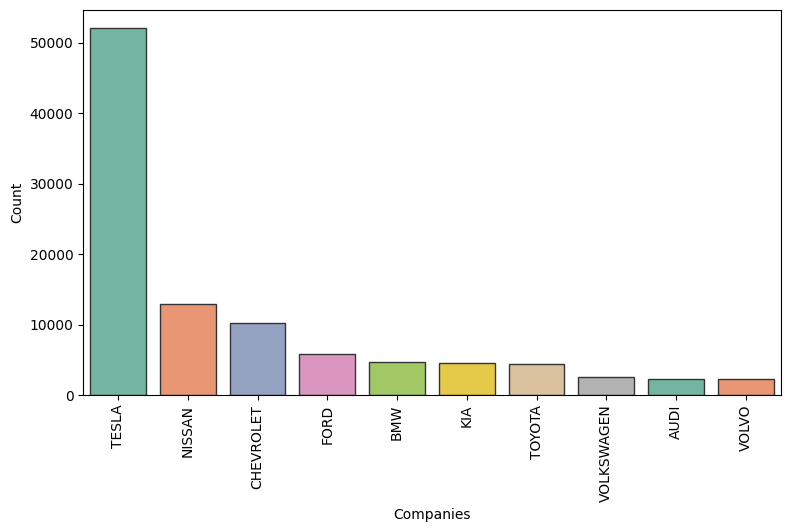

In [11]:
# which company makes most of the electric vehicles

Companies = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Companies)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

In [12]:
px.pie(names=list(Companies)[:10],values=values[:10],width=500,height=400)

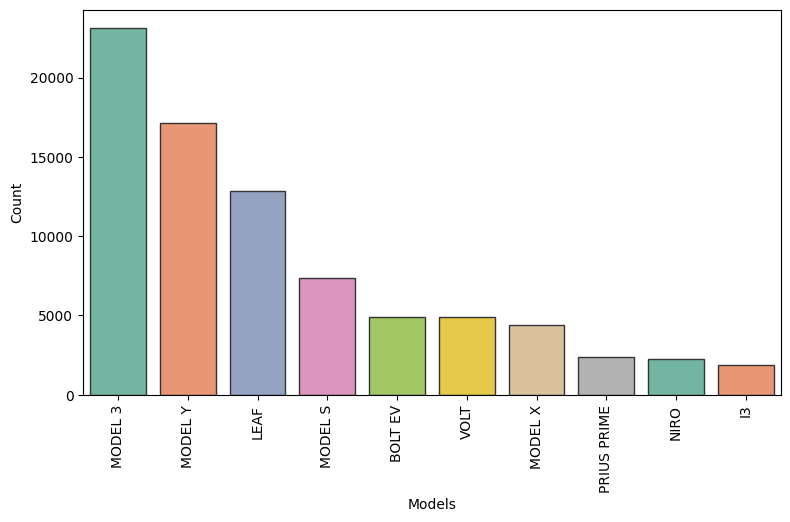

In [13]:
#Top 10 models in use

Models = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Models)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()

In [14]:
#Percentage of BEV vs PHEV

Vehicle_type = list(df.groupby('Electric Vehicle Type').count()['County'].index)
values = df.groupby('Electric Vehicle Type').count()['County'].values

px.pie(names=Vehicle_type,values=values,height=400)

<AxesSubplot: xlabel='Electric Range', ylabel='Count'>

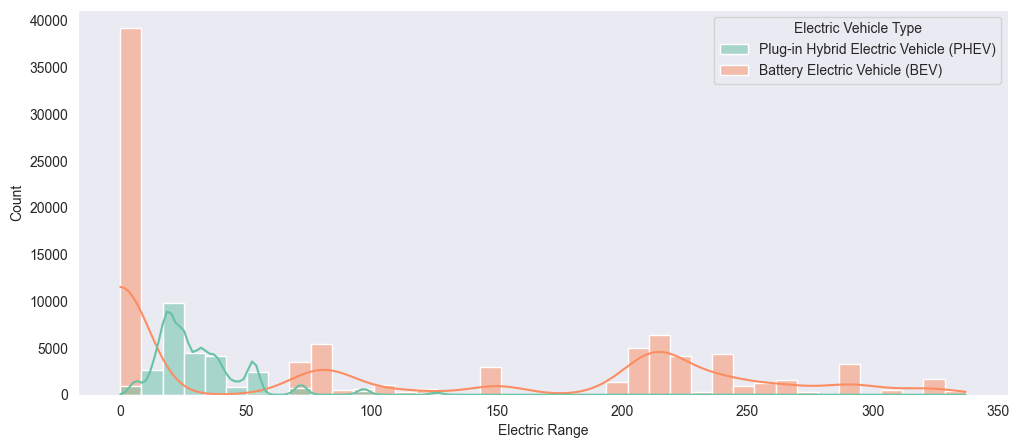

In [15]:
# the electric range difference between PHEV and BEV
plt.figure(figsize=(12,5))
sns.set_style(style='dark')
sns.histplot(x = 'Electric Range',data=df,kde=True,hue='Electric Vehicle Type',palette='Set2')

**The data shows that BEVs will give more range but there are some vehicles which give almost 0 range on PHEV**

In [16]:
# top 10 most sold cars and top 10 most range giving vehicles and check if there is any correlation

top_10_vehicles = list(df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index)[:10]

top_10_range =  df.sort_values(by='Electric Range',ascending=False)['Model'].unique()[:10]

In [17]:
top_10_vehicles

['MODEL 3',
 'MODEL Y',
 'LEAF',
 'MODEL S',
 'BOLT EV',
 'VOLT',
 'MODEL X',
 'PRIUS PRIME',
 'NIRO',
 'I3']

In [18]:
top_10_range

array(['MODEL S', 'MODEL 3', 'MODEL X', 'MODEL Y', 'BOLT EV', 'KONA',
       'ROADSTER', 'NIRO', 'I-PACE', 'PS2'], dtype=object)

**6 out of top 10 most selling ones are in the top_10 electric range vehicles so range can be a reason of their sales**

In [19]:
#what are the most sold models per each company
#lets consider the top 10 companies
top_10_companies = list(Companies)[:10]
for i in top_10_companies:
    data = df[df['Make']==i]
    data = data.groupby('Model').count().sort_values(by='City',ascending=False).index
    print('Top selling model for',i,'is ----------->',data[0])

Top selling model for TESLA is -----------> MODEL 3
Top selling model for NISSAN is -----------> LEAF
Top selling model for CHEVROLET is -----------> BOLT EV
Top selling model for FORD is -----------> FUSION
Top selling model for BMW is -----------> I3
Top selling model for KIA is -----------> NIRO
Top selling model for TOYOTA is -----------> PRIUS PRIME
Top selling model for VOLKSWAGEN is -----------> ID.4
Top selling model for AUDI is -----------> E-TRON
Top selling model for VOLVO is -----------> XC90


<AxesSubplot: xlabel='Model Year', ylabel='count'>

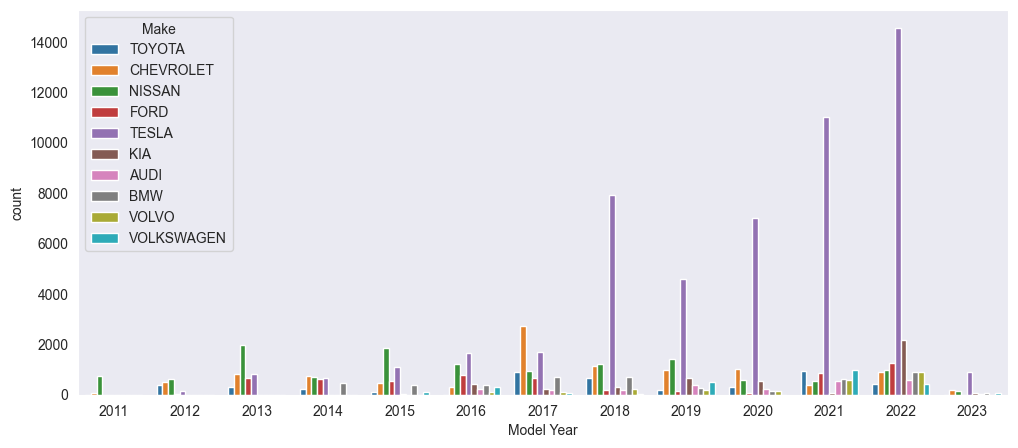

In [20]:
#Number of models of company for each year for last 10 years
#lets consider top_10 companies only

data = df.copy()
data['top_10'] = data['Make'].apply(lambda x:1 if x in top_10_companies else 0)
data = data[data['top_10']==1]
data = data[data['Model Year']>=2011]
plt.figure(figsize=(12,5))
sns.countplot(x = 'Model Year',hue='Make',data=data)

# Task 2

## Choropleth to display number of EV vehicles based on location.

In [21]:
states = list(df.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)
values = df.groupby('State').count().sort_values(by='City',ascending=False)['City'].values

In [22]:
data = pd.DataFrame(df.groupby('State').count().sort_values(by='City',ascending=False)['City'])

In [23]:
data = data.reset_index()

In [24]:
data.columns = ['State','Count']

In [25]:
fig = px.choropleth(data,
                    locations='State',
                    locationmode="USA-states",
                    color='Count',
                    color_continuous_scale="greens",
                    scope="usa")

fig.show()

# Task 3

## Racing Bar Plot to display the animation of EV Make and its count each year

In [26]:
import bar_chart_race as bcr

In [27]:
grouped_data = df.groupby(['Model Year', 'Make'])['Make'].count().reset_index(name='Count')

# Pivot the data to have years as columns and makes as rows
pivot_data = grouped_data.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

# Create the racing bar plot
bcr.bar_chart_race(
    df=pivot_data,
    filename='EV_Make_Racing_Bar_Plot.mp4',  # Output filename for the animation
    title='EV Make Count Each Year',
    orientation='h',  # Horizontal bars
    sort='desc',      # Sort bars in descending order each frame
    n_bars=10,        # Display top 10 makes in each frame
    steps_per_period=45,
    period_length=3000,
    cmap='dark12',    # Choose a colormap (can be any colormap supported by matplotlib)
    dpi=150           # Set the resolution of the animation
)

In [28]:
bcr.bar_chart_race(
    df=pivot_data,
    title='EV Make Count Each Year',
    orientation='h',  # Horizontal bars
    sort='desc',      # Sort bars in descending order each frame
    n_bars=10,        # Display top 10 makes in each frame
    steps_per_period=45,
    period_length=3000,
    cmap='dark12',    # Choose a colormap (can be any colormap supported by matplotlib)
    dpi=150           # Set the resolution of the animation
)